# Ejemplo de algoritmos jerárquicos

En este ejemplo mostraremos un sencillo codigo para ilustrar el algoritmo de clustering jerárquico y como este puede utilizarse en problemas de análisis cluster.

Para este ejemplo utilizaremos información sobre la renta de los municipios de más de 5000 habitantes en España. Estos datos los proporciona FEDEA en este [enlace](http://www.fedea.net/renta/).

Vamos a intentar realizar un análisis cluster de estos datos para ver qué podemos extraer de ellos teniendo en cuenta que el objetivo de los indicadores incluidos en el DataSet es reflejar la posible desigualdad en la distribución de la renta.

## Importación de los datos

En primer lugar, tenemos que descargar el [archivo de datos excel](http://www.fedea.net/renta/docs/Renta_local_2007.xlsx) y tomar los datos que queramos.

En este ejemplo, consideramos todos los indicadores relacionados con los ingresos y la distribución de la renta. Exportamos los datos a un archivo de texto y luego hacemos algunas transformaciones que nos faciliten el trabajo, por ejemplo, eliminar los puntos, cambiar las comas decimales por puntos, eliminar el carácter % y sustituir el separador del tabulador ('\t') por la coma. El resultado es un fichero de 1109 líneas con los datos de renta y distribución de renta que nos da el excel de FEDEA (13 atributos). El CSV después de realizar estas transformaciones puede descargarse en:
https://drive.google.com/file/d/1LG87Qitl1RU2TIZ-AkSEDh5wNGO_wiGX



In [ ]:
# Descargar el dataset que se utilizará utiliznado un enlace compartido de google drive
# Si la URL es https://drive.google.com/uc?id=IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
!gdown --id 1LG87Qitl1RU2TIZ-AkSEDh5wNGO_wiGX

# El fichero puede descargarse manualmente en https://drive.google.com/file/d/1LG87Qitl1RU2TIZ-AkSEDh5wNGO_wiGX

# Cargamos el fichero
import pandas as pd
municipios = pd.read_csv('municipios.csv', delimiter=',')
municipios

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LG87Qitl1RU2TIZ-AkSEDh5wNGO_wiGX
To: /content/municipios.csv
100% 97.4k/97.4k [00:00<00:00, 56.2MB/s]


,RentaAgregada,RentaDeclarante,RentaHabitante,Gini,Atkinson,Top1,TopMedio,TopDecimo,Quintil1,Quintil2,Quintil3,Quintil4,Quintil5
0,47341212847,30735.04,15113.10,0.52257,0.25433,16.71,12.92,6.82,3.23,8.56,12.96,19.26,55.99
1,24055617498,30816.83,15080.85,0.53002,0.26068,16.79,13.22,7.67,2.94,8.31,13.01,19.46,56.28
2,9604354940,25067.22,12040.75,0.50176,0.23535,14.84,11.47,6.35,3.08,8.64,13.43,20.04,54.81
3,6961701590,24214.53,9957.45,0.48521,0.22003,12.90,9.86,5.39,3.05,8.94,14.22,21.77,52.03
4,8387035266,23362.02,12816.57,0.46188,0.19791,11.06,7.97,3.69,3.49,9.83,14.97,21.60,50.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,31306678,15271.55,6251.33,0.43148,0.18012,6.09,3.69,1.07,2.78,10.08,17.77,23.40,45.98
1105,26156256,13196.90,5226.03,0.45141,0.18964,7.77,5.25,0.81,3.29,9.30,17.00,22.00,48.41
1106,22981326,11354.41,4594.43,0.40600,0.14656,4.36,2.48,0.65,3.98,9.97,16.75,24.90,44.39
1107,658471496,26551.27,8595.90,0.42050,0.16373,8.60,5.93,1.89,4.13,10.62,15.91,23.06,46.28


## Transformación de los datos

Tenemos que escalar los datos a una escala [0,1]. Esto se debe a que los datos que tenemos son datos brutos, porcentajes, índices, etc. que tienen distintas escalas.

No es necesario escalar/normalizar todas las variables (los índices de Gini y Atkinson ya están escalados) pero para mantener la uniformidad en el tratamiento vamos a aplicar el [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) a todas las variables.

MinMaxScaler reduce la dispersión de los datos, si queremos mantener la dispersión lo que haríamos es utilizar el [MaxAbsScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler).

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
municipios_scaled = min_max_scaler.fit_transform(municipios)
municipios_scaled

array([[1.00000000e+00, 4.36481259e-01, 5.04094332e-01, ...,
        3.40826686e-01, 3.07031250e-01, 6.63841808e-01],
       [5.07985668e-01, 4.38148466e-01, 5.02921145e-01, ...,
        3.44452502e-01, 3.14843750e-01, 6.70143416e-01],
       [2.02636882e-01, 3.20948499e-01, 3.92328702e-01, ...,
        3.74909355e-01, 3.37500000e-01, 6.38200782e-01],
       ...,
       [1.86694750e-04, 4.14267811e-02, 1.21447244e-01, ...,
        6.15663524e-01, 5.27343750e-01, 4.11777488e-01],
       [1.36143210e-02, 3.51199353e-01, 2.67012305e-01, ...,
        5.54749819e-01, 4.55468750e-01, 4.52846588e-01],
       [1.22942185e-02, 3.26507212e-01, 2.66538665e-01, ...,
        5.33720087e-01, 4.84765625e-01, 4.76749239e-01]])

Tenemos que ser conscientes de que *municipios_scaled* es ahora una matriz de numpy, que no es la misma *estructura de datos* que *municipios* (que es un dataframe).

Antes de realizar el clustering sería recomendable seleccionar aquellas variables que nos parezcan más significativas para el problema.  Esto es recomendable incluso antes de realizar el procesamiento de los datos, pero esto sólo es posible si conocemos bien el problema de antemano.

Si no conocemos el problema, podemos estudiar cómo se distribuyen esos datos una vez han sido cargados, como por ejemplo, ver la correlación entre variables y/o realizar un **análisis de componentes principales (PCA)** para obtener una proyección 2D de los datos que podamos visualizar y poder así tomar una decisión al respecto.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(municipios_scaled)
print(pca.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=municipios.columns)

[0.61486174 0.17073945]


,PC-1,PC-2
RentaAgregada,0.014461,0.034816
RentaDeclarante,0.164050,0.564170
RentaHabitante,0.146291,0.627437
Gini,0.311854,-0.183151
Atkinson,0.354241,-0.140719
Top1,0.406735,0.111928
TopMedio,0.346015,0.129301
TopDecimo,0.185167,0.118717
Quintil1,-0.104801,0.201177
Quintil2,-0.286309,0.340894


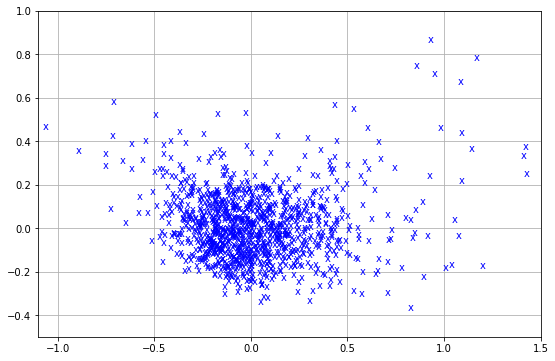

In [ ]:
# Visualizar el dataset utilizando las dos dimensiones obtenidas en el PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)
plt.grid()
plt.show()

La variable *explained_variance_ratio_* que contiene el ratio de varianza explicada por cada una de las 2 *componentes principales* no es muy alta. Entonces, podemos concluir que la representatividad de la proyección no es muy buena. Sin embargo, podemos extraer como conclusión que los elementos son muy similares entre sí, y por lo tanto, no será fácil obtener un buen resultado de clustering.

## Ejecución del algoritmo de clustering jerárquico

A continuación, vamos a ejecutar un algoritmo de clustering jerárquico (notar que tardará un rato en ejecutarse) para ver cómo se distribuyen los datos.

Dado que la mayor parte de los datos están muy concentrados y el resto parecen valores atípicos, es mejor no utilizar como distancia intercluster el **vecino más próximo** (single). Las opciones más recomendadas para este problema van desde el **vecino más alejado** (complete) hasta la **mínima varianza** (ward).

Utilizaremos como distancia el vecino más alejado (complete) ya que nos permitirá dividir los grupos más grandes. Se establece un umbral (threshold) de $15$ como distancia a partir de la cual se considerará que los grupos a distancia mayor son grupos independientes (y por lo tanto no se agruparan).


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
<ipython-input-5-58b4aaa64ffc>:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


Distancia Media	   0.47


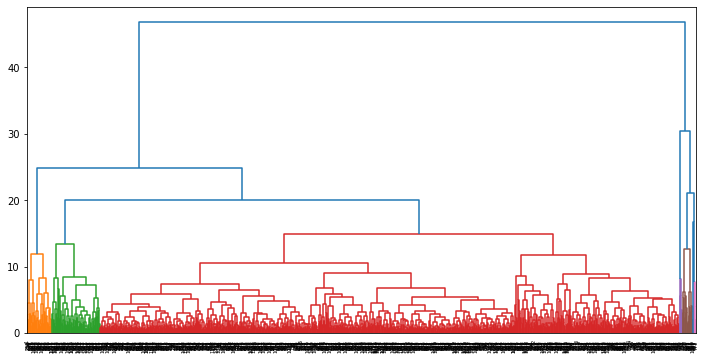

In [ ]:
## Clustering jerárquico
# 1. Obtener la matriz de distancia entre todos los elementos
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(municipios_scaled)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Constuimos el dendograma
from scipy import cluster
plt.figure(figsize=(12, 6))
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=15)
plt.show()

# Para más información consultar:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Tras realizar el corte a una distancia de $15$ utilizando distancia intercluster el vecino más alejado (complete), obtenemos $7$ grupos. Este nivel de corte debe realizarse ad-hoc en un nível que consideremos lógico. En este caso concreto, vemos que realizar este corte nos da unos cuantos outiliers (grupos de un solo elemento).

A continuación vamos a obtener un vector (*labels*) que, dada una distancia de corte (*threshold*) y un criterio de distancia intercluster, contenga el grupo al que pertece cada elemento.

In [ ]:
# 3. Obtenemos el grupo al que pertenece cada observación
threshold = 15 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 7


array([5, 1, 3, ..., 3, 3, 3], dtype=int32)

Ahora podemos volver a representar gráficamente los datos del PCA (en dos dimensiones) pero introduciendo como color los resultados de las etiquetas. Se puede ver que el clustering no ha quedado nada mal, los resultados son coherentes.

{1, 2, 3, 4, 5, 6, 7}


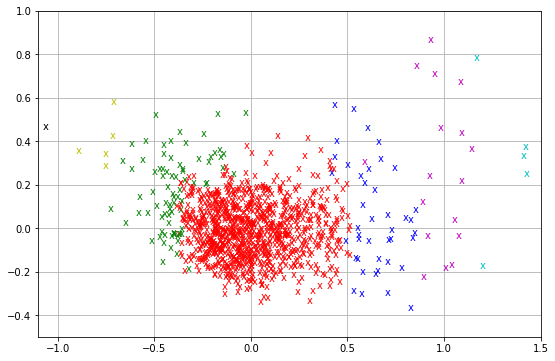

In [ ]:
# Modifico el original y pongo comentadas las líneas a mejorar
colores = 'bgrcmyk'
#colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colores = np.hstack([colores] * 20)

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i] - 1])
plt.xlim(-1.1, 1.5)
plt.ylim(-0.5, 1)
plt.grid()
plt.show()